## **Data Exploration**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [8]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [10]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [11]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [12]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [13]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [14]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [15]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [16]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [18]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=42)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

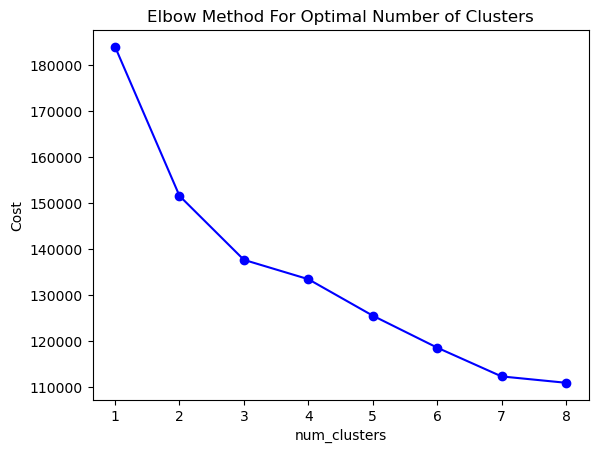

In [19]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [20]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


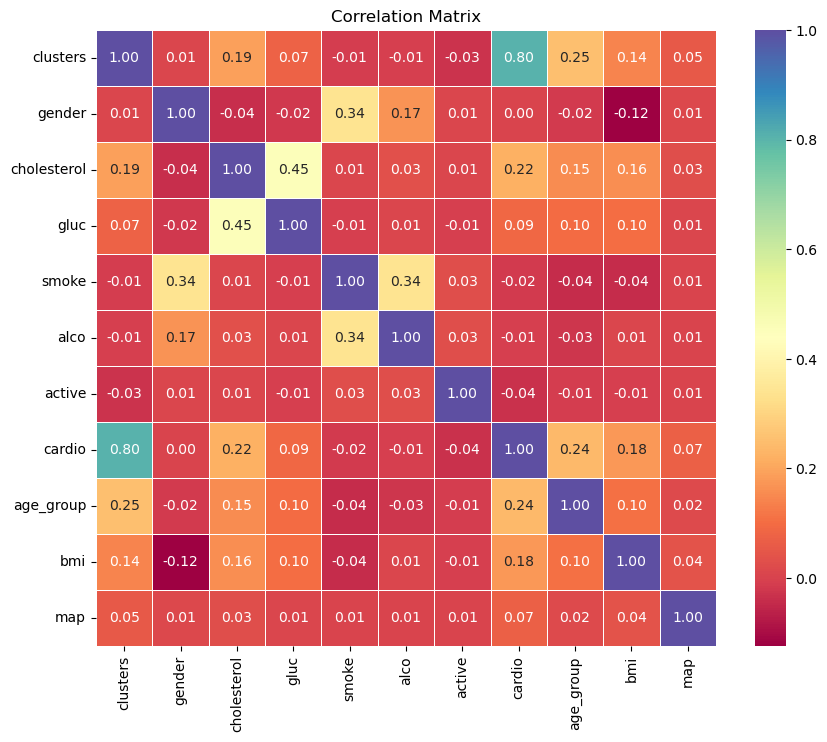

In [22]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

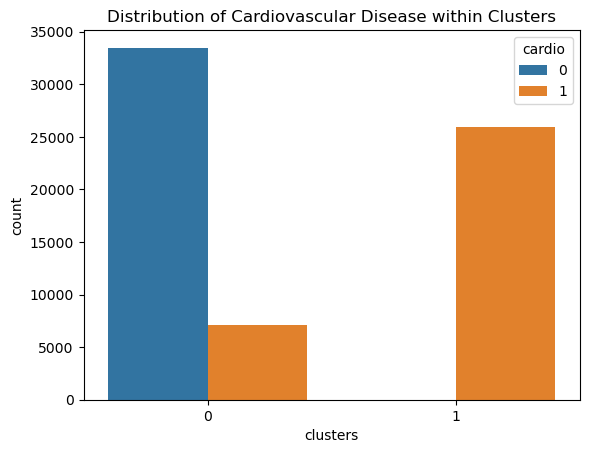

In [23]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [24]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [26]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [27]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [28]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.41585759 -0.39826067  1.24790597 ...  1.43792489 -0.55222813
  -0.17812678]
 [-0.80297875 -0.63969305 -0.4686422  ...  0.04299719 -0.41369236
  -0.15473541]
 [-0.76177045 -0.48471435 -0.45276236 ...  0.09074869 -0.47325421
  -0.11895903]
 ...
 [ 1.2008748   2.36309135 -0.46894876 ...  1.42804688  0.55537796
  -0.02260244]
 [-0.97337656 -0.4337051  -0.46720344 ... -0.71403321  0.80153034
  -0.13302679]
 [-0.7377695  -0.64570203 -0.26757039 ... -0.60248864 -0.48410892
  -0.18822129]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.01366401 -0.6778021  -0.46602442 ...  0.69299787  0.64441955
  -0.1957484 ]
 [ 1.2176136   0.88287577 -0.33391124 ...  0.66741923  0.70546396
  -0.04899061]
 [-0.8578253   2.17956766 -0.37824981 ... -0.82193794 -0.69184376
  -0.08507476]
 ...
 [ 1.10388937  0.84326034 -0.41743569 ...  0.84408977 -0.39529239
  -0.19857933]
 [ 1.14789791 -0.52169169 -0.38745635 ...  1.53157193  0.76155493
  -0.19281379]
 [-0.70112016 -0

In [29]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [31]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
       
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [32]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [33]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)
    print("Classification Report for RNN:")
    print(classification_report(final_true_labels, final_predicted_labels, digits=4))

rnn_model = RNNModel()
batch_size = 64
epochs = 150
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/150, Average Loss: 0.3685155045352387
Epoch 5/150, Average Loss: 0.16291429430887264
Epoch 10/150, Average Loss: 0.15185560132493683
Epoch 15/150, Average Loss: 0.149521260327585
Epoch 20/150, Average Loss: 0.14869179182297582
Epoch 25/150, Average Loss: 0.14830133042953633
Epoch 30/150, Average Loss: 0.14766506163521337
Epoch 35/150, Average Loss: 0.14746066681337472
Epoch 40/150, Average Loss: 0.14723959231355285
Epoch 45/150, Average Loss: 0.14725302425051817
Epoch 50/150, Average Loss: 0.14711850541093016
Epoch 55/150, Average Loss: 0.1470414510568695
Epoch 60/150, Average Loss: 0.1469517275245956
Epoch 65/150, Average Loss: 0.14658953098573566
Epoch 70/150, Average Loss: 0.14679473409765226
Epoch 75/150, Average Loss: 0.1465509120450581
Epoch 80/150, Average Loss: 0.14655430034568517
Epoch 85/150, Average Loss: 0.1464316750672983
Epoch 90/150, Average Loss: 0.14648535532549717
Epoch 95/150, Average Loss: 0.1464388114238868
Epoch 100/150, Average Loss: 0.14617052336480454
E

In [36]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


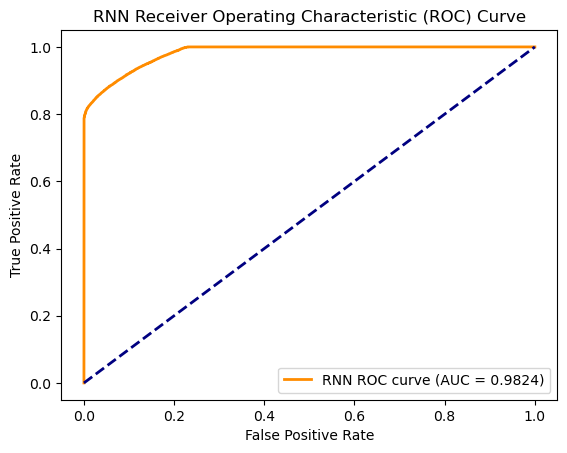

In [37]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [38]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
837/837 [==============================] - 1s 370us/step - loss: 0.4437 - accuracy: 0.8666
Epoch 2/50
837/837 [==============================] - 1s 611us/step - loss: 0.2648 - accuracy: 0.9097
Epoch 3/50
837/837 [==============================] - 0s 372us/step - loss: 0.2187 - accuracy: 0.9098
Epoch 4/50
837/837 [==============================] - 0s 363us/step - loss: 0.1942 - accuracy: 0.9103
Epoch 5/50
837/837 [==============================] - 0s 363us/step - loss: 0.1793 - accuracy: 0.9103
Epoch 6/50
837/837 [==============================] - 0s 362us/step - loss: 0.1700 - accuracy: 0.9113
Epoch 7/50
837/837 [==============================] - 0s 362us/step - loss: 0.1638 - accuracy: 0.9118
Epoch 8/50
837/837 [==============================] - 0s 364us/step - loss: 0.1598 - accuracy: 0.9113
Epoch 9/50
837/837 [==============================] - 0s 362us/step - loss: 0.1573 - accuracy: 0.9109
Epoch 10/50
837/837 [==============================] - 0s 374us/step - loss: 0.155

In [39]:
y_pred = kdnn_model.predict(x_train)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Classification Report for KDNN:")
print(classification_report(y_train, y_pred_binary,  digits=4))

1674/1674 [==============================] - 0s 238us/step
Classification Report for KDNN:
              precision    recall  f1-score   support

         0.0     0.9073    0.9204    0.9138     26824
         1.0     0.9190    0.9056    0.9122     26740

    accuracy                         0.9130     53564
   macro avg     0.9131    0.9130    0.9130     53564
weighted avg     0.9131    0.9130    0.9130     53564



419/419 [==============================] - 0s 239us/step


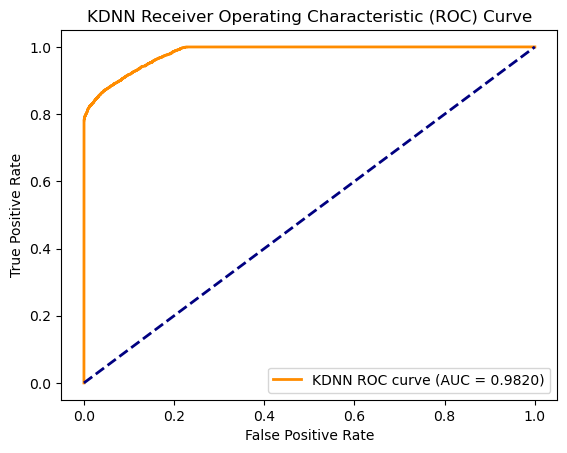

In [40]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [43]:
!pip install catboost
from catboost import CatBoostClassifier

In [44]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5536176	total: 69ms	remaining: 1m 8s
1:	learn: 0.4534652	total: 74.8ms	remaining: 37.3s
2:	learn: 0.3794373	total: 80.6ms	remaining: 26.8s
3:	learn: 0.3275783	total: 86.3ms	remaining: 21.5s
4:	learn: 0.2896301	total: 92ms	remaining: 18.3s
5:	learn: 0.2593696	total: 98ms	remaining: 16.2s
6:	learn: 0.2351026	total: 104ms	remaining: 14.7s
7:	learn: 0.2173970	total: 110ms	remaining: 13.6s
8:	learn: 0.2031345	total: 115ms	remaining: 12.7s
9:	learn: 0.1976676	total: 121ms	remaining: 12s
10:	learn: 0.1897258	total: 126ms	remaining: 11.4s
11:	learn: 0.1832191	total: 132ms	remaining: 10.9s
12:	learn: 0.1779142	total: 137ms	remaining: 10.4s
13:	learn: 0.1733025	total: 144ms	remaining: 10.1s
14:	learn: 0.1692888	total: 149ms	remaining: 9.81s
15:	learn: 0.1670161	total: 155ms	remaining: 9.53s
16:	learn: 0.1641404	total: 161ms	remaining: 9.3s
17:	learn: 0.1624388	total: 167ms	remaining: 9.09s
18:	learn: 0.1609630	total: 172ms	remaining: 8.9s
19:	learn: 0.15

177:	learn: 0.1448039	total: 1000ms	remaining: 4.62s
178:	learn: 0.1447721	total: 1s	remaining: 4.61s
179:	learn: 0.1447267	total: 1.01s	remaining: 4.6s
180:	learn: 0.1446941	total: 1.01s	remaining: 4.59s
181:	learn: 0.1446553	total: 1.02s	remaining: 4.58s
182:	learn: 0.1444842	total: 1.02s	remaining: 4.57s
183:	learn: 0.1444322	total: 1.03s	remaining: 4.56s
184:	learn: 0.1444027	total: 1.03s	remaining: 4.55s
185:	learn: 0.1443483	total: 1.04s	remaining: 4.54s
186:	learn: 0.1443119	total: 1.04s	remaining: 4.54s
187:	learn: 0.1442711	total: 1.05s	remaining: 4.53s
188:	learn: 0.1442393	total: 1.05s	remaining: 4.53s
189:	learn: 0.1441893	total: 1.06s	remaining: 4.53s
190:	learn: 0.1441451	total: 1.07s	remaining: 4.52s
191:	learn: 0.1441063	total: 1.07s	remaining: 4.53s
192:	learn: 0.1440544	total: 1.08s	remaining: 4.53s
193:	learn: 0.1440127	total: 1.09s	remaining: 4.53s
194:	learn: 0.1439737	total: 1.1s	remaining: 4.53s
195:	learn: 0.1439378	total: 1.1s	remaining: 4.52s
196:	learn: 0.143

347:	learn: 0.1366151	total: 2.01s	remaining: 3.76s
348:	learn: 0.1365573	total: 2.01s	remaining: 3.76s
349:	learn: 0.1365255	total: 2.02s	remaining: 3.75s
350:	learn: 0.1364799	total: 2.02s	remaining: 3.74s
351:	learn: 0.1364253	total: 2.03s	remaining: 3.73s
352:	learn: 0.1363682	total: 2.03s	remaining: 3.73s
353:	learn: 0.1363160	total: 2.04s	remaining: 3.72s
354:	learn: 0.1362846	total: 2.04s	remaining: 3.71s
355:	learn: 0.1362138	total: 2.05s	remaining: 3.71s
356:	learn: 0.1361727	total: 2.05s	remaining: 3.7s
357:	learn: 0.1361342	total: 2.06s	remaining: 3.69s
358:	learn: 0.1360614	total: 2.06s	remaining: 3.69s
359:	learn: 0.1360258	total: 2.07s	remaining: 3.68s
360:	learn: 0.1359836	total: 2.07s	remaining: 3.67s
361:	learn: 0.1359468	total: 2.08s	remaining: 3.66s
362:	learn: 0.1358784	total: 2.08s	remaining: 3.66s
363:	learn: 0.1358431	total: 2.09s	remaining: 3.65s
364:	learn: 0.1357730	total: 2.09s	remaining: 3.64s
365:	learn: 0.1357324	total: 2.1s	remaining: 3.64s
366:	learn: 0.

539:	learn: 0.1286732	total: 3.01s	remaining: 2.56s
540:	learn: 0.1286379	total: 3.01s	remaining: 2.56s
541:	learn: 0.1286036	total: 3.02s	remaining: 2.55s
542:	learn: 0.1285628	total: 3.02s	remaining: 2.54s
543:	learn: 0.1285185	total: 3.03s	remaining: 2.54s
544:	learn: 0.1284978	total: 3.03s	remaining: 2.53s
545:	learn: 0.1284514	total: 3.04s	remaining: 2.53s
546:	learn: 0.1284245	total: 3.04s	remaining: 2.52s
547:	learn: 0.1283768	total: 3.05s	remaining: 2.51s
548:	learn: 0.1283269	total: 3.05s	remaining: 2.51s
549:	learn: 0.1282808	total: 3.06s	remaining: 2.5s
550:	learn: 0.1282412	total: 3.06s	remaining: 2.5s
551:	learn: 0.1282136	total: 3.07s	remaining: 2.49s
552:	learn: 0.1281743	total: 3.07s	remaining: 2.48s
553:	learn: 0.1281294	total: 3.08s	remaining: 2.48s
554:	learn: 0.1281006	total: 3.08s	remaining: 2.47s
555:	learn: 0.1280699	total: 3.09s	remaining: 2.46s
556:	learn: 0.1280275	total: 3.09s	remaining: 2.46s
557:	learn: 0.1279906	total: 3.1s	remaining: 2.45s
558:	learn: 0.1

700:	learn: 0.1229991	total: 3.81s	remaining: 1.63s
701:	learn: 0.1229596	total: 3.82s	remaining: 1.62s
702:	learn: 0.1229292	total: 3.83s	remaining: 1.61s
703:	learn: 0.1228982	total: 3.83s	remaining: 1.61s
704:	learn: 0.1228639	total: 3.83s	remaining: 1.6s
705:	learn: 0.1228308	total: 3.84s	remaining: 1.6s
706:	learn: 0.1227922	total: 3.85s	remaining: 1.59s
707:	learn: 0.1227506	total: 3.85s	remaining: 1.59s
708:	learn: 0.1227183	total: 3.86s	remaining: 1.58s
709:	learn: 0.1226808	total: 3.86s	remaining: 1.58s
710:	learn: 0.1226522	total: 3.87s	remaining: 1.57s
711:	learn: 0.1226299	total: 3.87s	remaining: 1.57s
712:	learn: 0.1225890	total: 3.88s	remaining: 1.56s
713:	learn: 0.1225304	total: 3.88s	remaining: 1.55s
714:	learn: 0.1225068	total: 3.89s	remaining: 1.55s
715:	learn: 0.1224583	total: 3.89s	remaining: 1.54s
716:	learn: 0.1224162	total: 3.9s	remaining: 1.54s
717:	learn: 0.1223857	total: 3.9s	remaining: 1.53s
718:	learn: 0.1223668	total: 3.91s	remaining: 1.53s
719:	learn: 0.12

895:	learn: 0.1166919	total: 4.82s	remaining: 559ms
896:	learn: 0.1166690	total: 4.82s	remaining: 554ms
897:	learn: 0.1166358	total: 4.83s	remaining: 548ms
898:	learn: 0.1166193	total: 4.83s	remaining: 543ms
899:	learn: 0.1165915	total: 4.83s	remaining: 537ms
900:	learn: 0.1165668	total: 4.84s	remaining: 532ms
901:	learn: 0.1165319	total: 4.84s	remaining: 526ms
902:	learn: 0.1164982	total: 4.85s	remaining: 521ms
903:	learn: 0.1164589	total: 4.86s	remaining: 516ms
904:	learn: 0.1164237	total: 4.86s	remaining: 510ms
905:	learn: 0.1163833	total: 4.87s	remaining: 505ms
906:	learn: 0.1163610	total: 4.87s	remaining: 499ms
907:	learn: 0.1163276	total: 4.88s	remaining: 494ms
908:	learn: 0.1162892	total: 4.88s	remaining: 489ms
909:	learn: 0.1162540	total: 4.89s	remaining: 483ms
910:	learn: 0.1162268	total: 4.89s	remaining: 478ms
911:	learn: 0.1161792	total: 4.89s	remaining: 472ms
912:	learn: 0.1161390	total: 4.9s	remaining: 467ms
913:	learn: 0.1161193	total: 4.91s	remaining: 462ms
914:	learn: 0

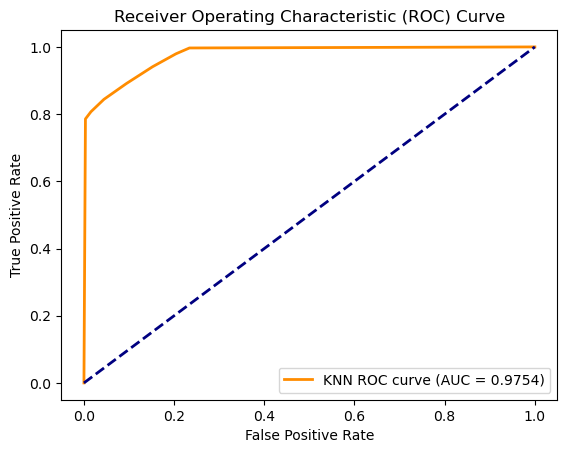

Decision Tree Metrics:
Accuracy: 0.9076
Precision: 0.9273
Recall: 0.8857
F1 Score: 0.9060
ROC AUC Score: 0.9077


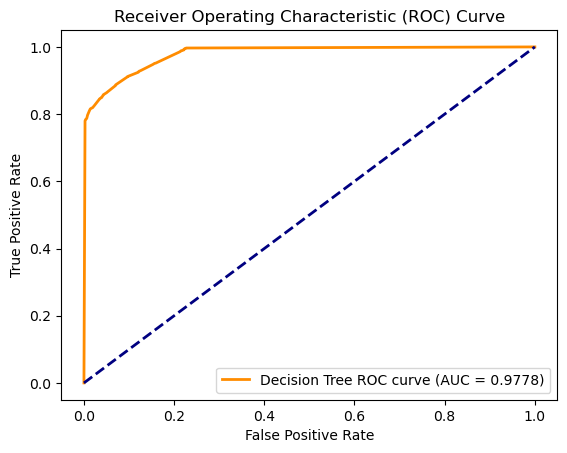

Random Forest Metrics:
Accuracy: 0.9095
Precision: 0.9655
Recall: 0.8505
F1 Score: 0.9044
ROC AUC Score: 0.9099


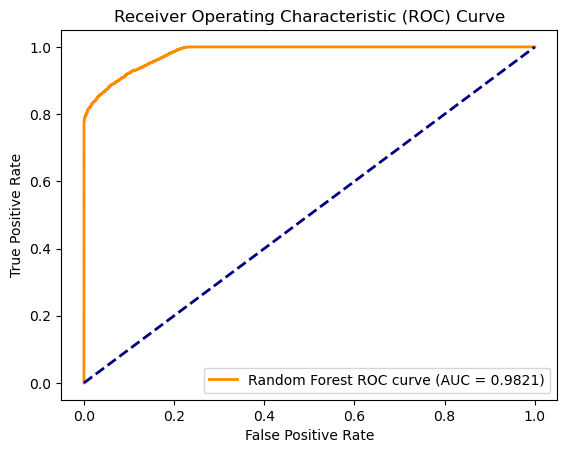

CatBoost Metrics:
Accuracy: 0.9054
Precision: 0.9236
Recall: 0.8851
F1 Score: 0.9040
ROC AUC Score: 0.9055


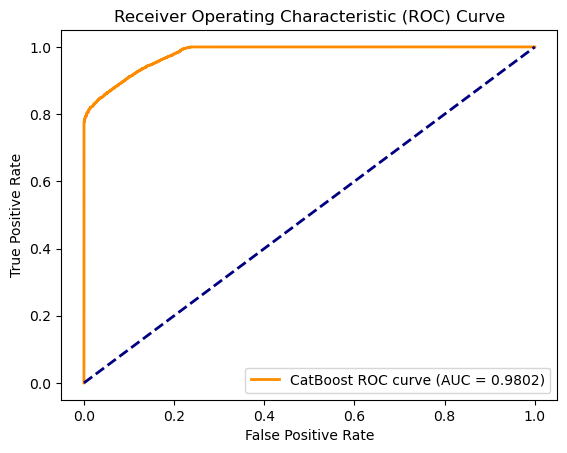

XGBoost Metrics:
Accuracy: 0.9092
Precision: 0.9360
Recall: 0.8796
F1 Score: 0.9070
ROC AUC Score: 0.9094


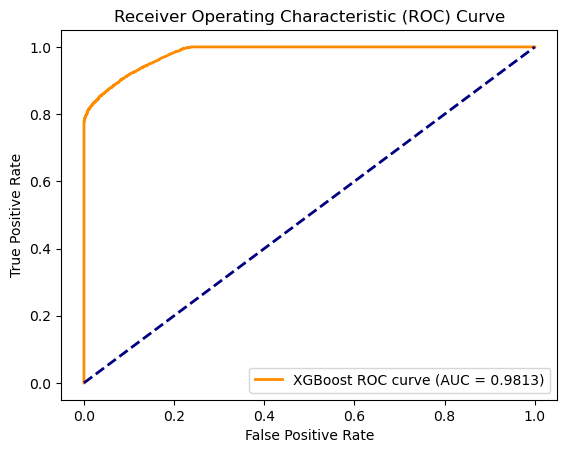

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [46]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5536176	total: 5.9ms	remaining: 5.9s
1:	learn: 0.4534652	total: 11.2ms	remaining: 5.59s
2:	learn: 0.3794373	total: 16.4ms	remaining: 5.45s
3:	learn: 0.3275783	total: 21.7ms	remaining: 5.4s
4:	learn: 0.2896301	total: 27.4ms	remaining: 5.46s
5:	learn: 0.2593696	total: 32.3ms	remaining: 5.36s
6:	learn: 0.2351026	total: 37.3ms	remaining: 5.29s
7:	learn: 0.2173970	total: 42.4ms	remaining: 5.26s
8:	learn: 0.2031345	total: 47.1ms	remaining: 5.19s
9:	learn: 0.1976676	total: 52.2ms	remaining: 5.17s
10:	learn: 0.1897258	total: 57.1ms	remaining: 5.13s
11:	learn: 0.1832191	total: 62ms	remaining: 5.1s
12:	learn: 0.1779142	total: 66.8ms	remaining: 5.07s
13:	learn: 0.1733025	total: 72ms	remaining: 5.07s
14:	learn: 0.1692888	total: 76.8ms	remaining: 5.04s
15:	learn: 0.1670161	total: 82.2ms	remaining: 5.05s
16:	learn: 0.1641404	total: 87.6ms	remaining: 5.06s
17:	learn: 0.1624388	total: 92.8ms	remaining: 5.06s
18:	learn: 0.1609630	total: 97.6ms	remaining: 5.04s


193:	learn: 0.1440127	total: 1s	remaining: 4.17s
194:	learn: 0.1439737	total: 1.01s	remaining: 4.16s
195:	learn: 0.1439378	total: 1.01s	remaining: 4.16s
196:	learn: 0.1438727	total: 1.02s	remaining: 4.16s
197:	learn: 0.1438243	total: 1.02s	remaining: 4.15s
198:	learn: 0.1437714	total: 1.03s	remaining: 4.14s
199:	learn: 0.1437432	total: 1.03s	remaining: 4.14s
200:	learn: 0.1436896	total: 1.04s	remaining: 4.13s
201:	learn: 0.1436502	total: 1.04s	remaining: 4.13s
202:	learn: 0.1436185	total: 1.05s	remaining: 4.12s
203:	learn: 0.1435788	total: 1.05s	remaining: 4.12s
204:	learn: 0.1435347	total: 1.06s	remaining: 4.11s
205:	learn: 0.1434444	total: 1.06s	remaining: 4.11s
206:	learn: 0.1433860	total: 1.07s	remaining: 4.1s
207:	learn: 0.1433542	total: 1.07s	remaining: 4.09s
208:	learn: 0.1432954	total: 1.08s	remaining: 4.09s
209:	learn: 0.1432494	total: 1.08s	remaining: 4.08s
210:	learn: 0.1431969	total: 1.09s	remaining: 4.08s
211:	learn: 0.1431589	total: 1.09s	remaining: 4.07s
212:	learn: 0.14

353:	learn: 0.1363160	total: 1.8s	remaining: 3.29s
354:	learn: 0.1362846	total: 1.81s	remaining: 3.29s
355:	learn: 0.1362138	total: 1.81s	remaining: 3.28s
356:	learn: 0.1361727	total: 1.82s	remaining: 3.28s
357:	learn: 0.1361342	total: 1.82s	remaining: 3.27s
358:	learn: 0.1360614	total: 1.83s	remaining: 3.27s
359:	learn: 0.1360258	total: 1.84s	remaining: 3.26s
360:	learn: 0.1359836	total: 1.84s	remaining: 3.26s
361:	learn: 0.1359468	total: 1.84s	remaining: 3.25s
362:	learn: 0.1358784	total: 1.85s	remaining: 3.25s
363:	learn: 0.1358431	total: 1.85s	remaining: 3.24s
364:	learn: 0.1357730	total: 1.86s	remaining: 3.24s
365:	learn: 0.1357324	total: 1.86s	remaining: 3.23s
366:	learn: 0.1357045	total: 1.87s	remaining: 3.23s
367:	learn: 0.1356636	total: 1.87s	remaining: 3.22s
368:	learn: 0.1356094	total: 1.88s	remaining: 3.21s
369:	learn: 0.1355794	total: 1.89s	remaining: 3.21s
370:	learn: 0.1355308	total: 1.89s	remaining: 3.21s
371:	learn: 0.1354943	total: 1.9s	remaining: 3.2s
372:	learn: 0.1

551:	learn: 0.1282136	total: 2.81s	remaining: 2.28s
552:	learn: 0.1281743	total: 2.81s	remaining: 2.27s
553:	learn: 0.1281294	total: 2.82s	remaining: 2.27s
554:	learn: 0.1281006	total: 2.82s	remaining: 2.26s
555:	learn: 0.1280699	total: 2.83s	remaining: 2.26s
556:	learn: 0.1280275	total: 2.83s	remaining: 2.25s
557:	learn: 0.1279906	total: 2.84s	remaining: 2.25s
558:	learn: 0.1279471	total: 2.84s	remaining: 2.24s
559:	learn: 0.1279055	total: 2.85s	remaining: 2.24s
560:	learn: 0.1278397	total: 2.85s	remaining: 2.23s
561:	learn: 0.1278067	total: 2.86s	remaining: 2.23s
562:	learn: 0.1277644	total: 2.86s	remaining: 2.22s
563:	learn: 0.1277204	total: 2.87s	remaining: 2.22s
564:	learn: 0.1276767	total: 2.87s	remaining: 2.21s
565:	learn: 0.1276542	total: 2.88s	remaining: 2.21s
566:	learn: 0.1276020	total: 2.88s	remaining: 2.2s
567:	learn: 0.1275695	total: 2.89s	remaining: 2.19s
568:	learn: 0.1275241	total: 2.89s	remaining: 2.19s
569:	learn: 0.1274817	total: 2.9s	remaining: 2.18s
570:	learn: 0.

742:	learn: 0.1215163	total: 3.82s	remaining: 1.32s
743:	learn: 0.1214817	total: 3.82s	remaining: 1.31s
744:	learn: 0.1214466	total: 3.83s	remaining: 1.31s
745:	learn: 0.1214035	total: 3.83s	remaining: 1.3s
746:	learn: 0.1213798	total: 3.83s	remaining: 1.3s
747:	learn: 0.1213502	total: 3.84s	remaining: 1.29s
748:	learn: 0.1213214	total: 3.85s	remaining: 1.29s
749:	learn: 0.1212792	total: 3.85s	remaining: 1.28s
750:	learn: 0.1212516	total: 3.86s	remaining: 1.28s
751:	learn: 0.1212209	total: 3.86s	remaining: 1.27s
752:	learn: 0.1211939	total: 3.87s	remaining: 1.27s
753:	learn: 0.1211384	total: 3.87s	remaining: 1.26s
754:	learn: 0.1211051	total: 3.88s	remaining: 1.26s
755:	learn: 0.1210754	total: 3.89s	remaining: 1.25s
756:	learn: 0.1210412	total: 3.89s	remaining: 1.25s
757:	learn: 0.1210169	total: 3.9s	remaining: 1.24s
758:	learn: 0.1209820	total: 3.9s	remaining: 1.24s
759:	learn: 0.1209398	total: 3.91s	remaining: 1.23s
760:	learn: 0.1208978	total: 3.92s	remaining: 1.23s
761:	learn: 0.12

938:	learn: 0.1153459	total: 4.82s	remaining: 313ms
939:	learn: 0.1153148	total: 4.82s	remaining: 308ms
940:	learn: 0.1152856	total: 4.83s	remaining: 303ms
941:	learn: 0.1152672	total: 4.83s	remaining: 298ms
942:	learn: 0.1152375	total: 4.84s	remaining: 293ms
943:	learn: 0.1151831	total: 4.85s	remaining: 287ms
944:	learn: 0.1151428	total: 4.85s	remaining: 282ms
945:	learn: 0.1151269	total: 4.86s	remaining: 277ms
946:	learn: 0.1151186	total: 4.86s	remaining: 272ms
947:	learn: 0.1150706	total: 4.87s	remaining: 267ms
948:	learn: 0.1150475	total: 4.87s	remaining: 262ms
949:	learn: 0.1150144	total: 4.88s	remaining: 257ms
950:	learn: 0.1149845	total: 4.88s	remaining: 252ms
951:	learn: 0.1149687	total: 4.89s	remaining: 246ms
952:	learn: 0.1149383	total: 4.89s	remaining: 241ms
953:	learn: 0.1149090	total: 4.9s	remaining: 236ms
954:	learn: 0.1148908	total: 4.9s	remaining: 231ms
955:	learn: 0.1148578	total: 4.91s	remaining: 226ms
956:	learn: 0.1148222	total: 4.92s	remaining: 221ms
957:	learn: 0.

In [47]:
from sklearn.base import BaseEstimator, ClassifierMixin

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [48]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

Learning rate set to 0.041939
0:	learn: 0.5867465	total: 3.96ms	remaining: 3.96s
1:	learn: 0.5025488	total: 8.05ms	remaining: 4.02s
2:	learn: 0.4339333	total: 11.6ms	remaining: 3.86s
3:	learn: 0.3858055	total: 15.1ms	remaining: 3.75s
4:	learn: 0.3488411	total: 18.7ms	remaining: 3.72s
5:	learn: 0.3148079	total: 22.3ms	remaining: 3.7s
6:	learn: 0.2834875	total: 25.7ms	remaining: 3.64s
7:	learn: 0.2622144	total: 29ms	remaining: 3.6s
8:	learn: 0.2448257	total: 32.9ms	remaining: 3.63s
9:	learn: 0.2343880	total: 36.6ms	remaining: 3.62s
10:	learn: 0.2190396	total: 40.1ms	remaining: 3.6s
11:	learn: 0.2071343	total: 43.7ms	remaining: 3.59s
12:	learn: 0.1998410	total: 47.1ms	remaining: 3.57s
13:	learn: 0.1915254	total: 50.5ms	remaining: 3.56s
14:	learn: 0.1868618	total: 53.8ms	remaining: 3.54s
15:	learn: 0.1823025	total: 56.9ms	remaining: 3.5s
16:	learn: 0.1786263	total: 60.7ms	remaining: 3.51s
17:	learn: 0.1747092	total: 63.9ms	remaining: 3.49s
18:	learn: 0.1723263	total: 67.2ms	remaining: 3.47

162:	learn: 0.1418357	total: 599ms	remaining: 3.08s
163:	learn: 0.1417790	total: 604ms	remaining: 3.08s
164:	learn: 0.1417422	total: 607ms	remaining: 3.07s
165:	learn: 0.1416674	total: 610ms	remaining: 3.07s
166:	learn: 0.1416150	total: 614ms	remaining: 3.06s
167:	learn: 0.1415386	total: 618ms	remaining: 3.06s
168:	learn: 0.1414999	total: 621ms	remaining: 3.05s
169:	learn: 0.1414323	total: 624ms	remaining: 3.05s
170:	learn: 0.1413955	total: 627ms	remaining: 3.04s
171:	learn: 0.1413257	total: 630ms	remaining: 3.03s
172:	learn: 0.1412772	total: 633ms	remaining: 3.03s
173:	learn: 0.1411965	total: 637ms	remaining: 3.02s
174:	learn: 0.1411092	total: 640ms	remaining: 3.02s
175:	learn: 0.1410645	total: 643ms	remaining: 3.01s
176:	learn: 0.1410249	total: 646ms	remaining: 3s
177:	learn: 0.1409773	total: 649ms	remaining: 3s
178:	learn: 0.1409129	total: 652ms	remaining: 2.99s
179:	learn: 0.1408464	total: 656ms	remaining: 2.99s
180:	learn: 0.1407965	total: 659ms	remaining: 2.98s
181:	learn: 0.1407

321:	learn: 0.1320366	total: 1.2s	remaining: 2.53s
322:	learn: 0.1319937	total: 1.2s	remaining: 2.52s
323:	learn: 0.1319334	total: 1.21s	remaining: 2.52s
324:	learn: 0.1318634	total: 1.21s	remaining: 2.52s
325:	learn: 0.1318107	total: 1.21s	remaining: 2.51s
326:	learn: 0.1317701	total: 1.22s	remaining: 2.5s
327:	learn: 0.1317314	total: 1.22s	remaining: 2.5s
328:	learn: 0.1316910	total: 1.22s	remaining: 2.5s
329:	learn: 0.1315834	total: 1.23s	remaining: 2.49s
330:	learn: 0.1315177	total: 1.23s	remaining: 2.49s
331:	learn: 0.1314552	total: 1.23s	remaining: 2.48s
332:	learn: 0.1313938	total: 1.24s	remaining: 2.48s
333:	learn: 0.1313386	total: 1.24s	remaining: 2.48s
334:	learn: 0.1313033	total: 1.25s	remaining: 2.47s
335:	learn: 0.1312339	total: 1.25s	remaining: 2.47s
336:	learn: 0.1311713	total: 1.25s	remaining: 2.46s
337:	learn: 0.1311165	total: 1.25s	remaining: 2.46s
338:	learn: 0.1310684	total: 1.26s	remaining: 2.46s
339:	learn: 0.1310164	total: 1.26s	remaining: 2.45s
340:	learn: 0.130

489:	learn: 0.1227166	total: 1.8s	remaining: 1.87s
490:	learn: 0.1226989	total: 1.8s	remaining: 1.87s
491:	learn: 0.1226346	total: 1.81s	remaining: 1.86s
492:	learn: 0.1225908	total: 1.81s	remaining: 1.86s
493:	learn: 0.1225509	total: 1.81s	remaining: 1.86s
494:	learn: 0.1224857	total: 1.81s	remaining: 1.85s
495:	learn: 0.1224397	total: 1.82s	remaining: 1.85s
496:	learn: 0.1224230	total: 1.82s	remaining: 1.84s
497:	learn: 0.1223468	total: 1.82s	remaining: 1.84s
498:	learn: 0.1222910	total: 1.83s	remaining: 1.84s
499:	learn: 0.1222352	total: 1.83s	remaining: 1.83s
500:	learn: 0.1221581	total: 1.84s	remaining: 1.83s
501:	learn: 0.1221186	total: 1.84s	remaining: 1.83s
502:	learn: 0.1220652	total: 1.84s	remaining: 1.82s
503:	learn: 0.1220113	total: 1.85s	remaining: 1.82s
504:	learn: 0.1219687	total: 1.85s	remaining: 1.81s
505:	learn: 0.1219005	total: 1.85s	remaining: 1.81s
506:	learn: 0.1218556	total: 1.86s	remaining: 1.81s
507:	learn: 0.1217757	total: 1.86s	remaining: 1.8s
508:	learn: 0.1

652:	learn: 0.1148122	total: 2.4s	remaining: 1.27s
653:	learn: 0.1147561	total: 2.4s	remaining: 1.27s
654:	learn: 0.1147052	total: 2.4s	remaining: 1.27s
655:	learn: 0.1146640	total: 2.41s	remaining: 1.26s
656:	learn: 0.1146142	total: 2.41s	remaining: 1.26s
657:	learn: 0.1145820	total: 2.41s	remaining: 1.25s
658:	learn: 0.1145240	total: 2.42s	remaining: 1.25s
659:	learn: 0.1144903	total: 2.42s	remaining: 1.25s
660:	learn: 0.1144476	total: 2.42s	remaining: 1.24s
661:	learn: 0.1143961	total: 2.43s	remaining: 1.24s
662:	learn: 0.1143456	total: 2.43s	remaining: 1.24s
663:	learn: 0.1143187	total: 2.44s	remaining: 1.23s
664:	learn: 0.1142651	total: 2.44s	remaining: 1.23s
665:	learn: 0.1142062	total: 2.44s	remaining: 1.22s
666:	learn: 0.1141639	total: 2.44s	remaining: 1.22s
667:	learn: 0.1141285	total: 2.45s	remaining: 1.22s
668:	learn: 0.1140926	total: 2.45s	remaining: 1.21s
669:	learn: 0.1140183	total: 2.46s	remaining: 1.21s
670:	learn: 0.1139892	total: 2.46s	remaining: 1.21s
671:	learn: 0.1

818:	learn: 0.1073119	total: 2.99s	remaining: 661ms
819:	learn: 0.1072568	total: 3s	remaining: 658ms
820:	learn: 0.1072282	total: 3s	remaining: 654ms
821:	learn: 0.1071889	total: 3s	remaining: 650ms
822:	learn: 0.1071388	total: 3s	remaining: 646ms
823:	learn: 0.1071016	total: 3.01s	remaining: 642ms
824:	learn: 0.1070777	total: 3.01s	remaining: 639ms
825:	learn: 0.1070397	total: 3.02s	remaining: 635ms
826:	learn: 0.1069994	total: 3.02s	remaining: 632ms
827:	learn: 0.1069625	total: 3.02s	remaining: 628ms
828:	learn: 0.1069173	total: 3.03s	remaining: 625ms
829:	learn: 0.1068813	total: 3.03s	remaining: 621ms
830:	learn: 0.1068409	total: 3.03s	remaining: 617ms
831:	learn: 0.1068014	total: 3.04s	remaining: 613ms
832:	learn: 0.1067808	total: 3.04s	remaining: 610ms
833:	learn: 0.1067571	total: 3.04s	remaining: 606ms
834:	learn: 0.1067103	total: 3.05s	remaining: 602ms
835:	learn: 0.1066708	total: 3.05s	remaining: 599ms
836:	learn: 0.1066389	total: 3.06s	remaining: 595ms
837:	learn: 0.1066093	to

983:	learn: 0.1009448	total: 3.59s	remaining: 58.4ms
984:	learn: 0.1009035	total: 3.6s	remaining: 54.8ms
985:	learn: 0.1008819	total: 3.6s	remaining: 51.1ms
986:	learn: 0.1008502	total: 3.6s	remaining: 47.5ms
987:	learn: 0.1008145	total: 3.61s	remaining: 43.8ms
988:	learn: 0.1008039	total: 3.61s	remaining: 40.2ms
989:	learn: 0.1007512	total: 3.61s	remaining: 36.5ms
990:	learn: 0.1007098	total: 3.62s	remaining: 32.9ms
991:	learn: 0.1006816	total: 3.62s	remaining: 29.2ms
992:	learn: 0.1006426	total: 3.62s	remaining: 25.5ms
993:	learn: 0.1006116	total: 3.63s	remaining: 21.9ms
994:	learn: 0.1005862	total: 3.63s	remaining: 18.2ms
995:	learn: 0.1005591	total: 3.63s	remaining: 14.6ms
996:	learn: 0.1005011	total: 3.64s	remaining: 10.9ms
997:	learn: 0.1004587	total: 3.64s	remaining: 7.3ms
998:	learn: 0.1004218	total: 3.64s	remaining: 3.65ms
999:	learn: 0.1003897	total: 3.65s	remaining: 0us
Learning rate set to 0.041939
0:	learn: 0.5918683	total: 4.38ms	remaining: 4.38s
1:	learn: 0.5242958	total

166:	learn: 0.1469328	total: 597ms	remaining: 2.98s
167:	learn: 0.1468684	total: 601ms	remaining: 2.98s
168:	learn: 0.1468170	total: 604ms	remaining: 2.97s
169:	learn: 0.1467688	total: 608ms	remaining: 2.97s
170:	learn: 0.1466639	total: 612ms	remaining: 2.97s
171:	learn: 0.1466128	total: 616ms	remaining: 2.96s
172:	learn: 0.1465360	total: 619ms	remaining: 2.96s
173:	learn: 0.1464693	total: 622ms	remaining: 2.95s
174:	learn: 0.1464048	total: 626ms	remaining: 2.95s
175:	learn: 0.1463366	total: 631ms	remaining: 2.96s
176:	learn: 0.1462876	total: 635ms	remaining: 2.95s
177:	learn: 0.1462236	total: 638ms	remaining: 2.94s
178:	learn: 0.1461684	total: 642ms	remaining: 2.94s
179:	learn: 0.1460746	total: 646ms	remaining: 2.94s
180:	learn: 0.1460146	total: 650ms	remaining: 2.94s
181:	learn: 0.1459809	total: 653ms	remaining: 2.94s
182:	learn: 0.1458559	total: 657ms	remaining: 2.93s
183:	learn: 0.1457823	total: 660ms	remaining: 2.93s
184:	learn: 0.1457523	total: 664ms	remaining: 2.93s
185:	learn: 

330:	learn: 0.1364190	total: 1.2s	remaining: 2.42s
331:	learn: 0.1363557	total: 1.2s	remaining: 2.42s
332:	learn: 0.1362749	total: 1.21s	remaining: 2.41s
333:	learn: 0.1362015	total: 1.21s	remaining: 2.41s
334:	learn: 0.1361367	total: 1.21s	remaining: 2.4s
335:	learn: 0.1360792	total: 1.22s	remaining: 2.4s
336:	learn: 0.1360098	total: 1.22s	remaining: 2.4s
337:	learn: 0.1359435	total: 1.22s	remaining: 2.39s
338:	learn: 0.1358734	total: 1.23s	remaining: 2.39s
339:	learn: 0.1358082	total: 1.23s	remaining: 2.38s
340:	learn: 0.1357313	total: 1.23s	remaining: 2.38s
341:	learn: 0.1356685	total: 1.24s	remaining: 2.38s
342:	learn: 0.1356138	total: 1.24s	remaining: 2.37s
343:	learn: 0.1355375	total: 1.24s	remaining: 2.37s
344:	learn: 0.1354770	total: 1.25s	remaining: 2.37s
345:	learn: 0.1354438	total: 1.25s	remaining: 2.36s
346:	learn: 0.1353824	total: 1.25s	remaining: 2.36s
347:	learn: 0.1353115	total: 1.26s	remaining: 2.36s
348:	learn: 0.1352658	total: 1.26s	remaining: 2.35s
349:	learn: 0.135

490:	learn: 0.1273855	total: 1.8s	remaining: 1.86s
491:	learn: 0.1273236	total: 1.8s	remaining: 1.86s
492:	learn: 0.1272792	total: 1.81s	remaining: 1.86s
493:	learn: 0.1272293	total: 1.81s	remaining: 1.85s
494:	learn: 0.1271769	total: 1.81s	remaining: 1.85s
495:	learn: 0.1271296	total: 1.82s	remaining: 1.85s
496:	learn: 0.1270783	total: 1.82s	remaining: 1.84s
497:	learn: 0.1270262	total: 1.82s	remaining: 1.84s
498:	learn: 0.1269613	total: 1.83s	remaining: 1.84s
499:	learn: 0.1269036	total: 1.83s	remaining: 1.83s
500:	learn: 0.1268304	total: 1.84s	remaining: 1.83s
501:	learn: 0.1267806	total: 1.84s	remaining: 1.83s
502:	learn: 0.1267136	total: 1.84s	remaining: 1.82s
503:	learn: 0.1266702	total: 1.85s	remaining: 1.82s
504:	learn: 0.1266253	total: 1.85s	remaining: 1.81s
505:	learn: 0.1265740	total: 1.85s	remaining: 1.81s
506:	learn: 0.1265458	total: 1.86s	remaining: 1.81s
507:	learn: 0.1265020	total: 1.86s	remaining: 1.8s
508:	learn: 0.1264644	total: 1.86s	remaining: 1.8s
509:	learn: 0.12

655:	learn: 0.1192516	total: 2.4s	remaining: 1.26s
656:	learn: 0.1191962	total: 2.4s	remaining: 1.25s
657:	learn: 0.1191498	total: 2.41s	remaining: 1.25s
658:	learn: 0.1191114	total: 2.41s	remaining: 1.25s
659:	learn: 0.1190765	total: 2.41s	remaining: 1.24s
660:	learn: 0.1190400	total: 2.42s	remaining: 1.24s
661:	learn: 0.1189923	total: 2.42s	remaining: 1.24s
662:	learn: 0.1189143	total: 2.42s	remaining: 1.23s
663:	learn: 0.1188859	total: 2.43s	remaining: 1.23s
664:	learn: 0.1188432	total: 2.43s	remaining: 1.22s
665:	learn: 0.1187900	total: 2.43s	remaining: 1.22s
666:	learn: 0.1187524	total: 2.44s	remaining: 1.22s
667:	learn: 0.1187163	total: 2.44s	remaining: 1.21s
668:	learn: 0.1186634	total: 2.44s	remaining: 1.21s
669:	learn: 0.1186054	total: 2.45s	remaining: 1.21s
670:	learn: 0.1185509	total: 2.45s	remaining: 1.2s
671:	learn: 0.1185158	total: 2.45s	remaining: 1.2s
672:	learn: 0.1184638	total: 2.46s	remaining: 1.19s
673:	learn: 0.1184174	total: 2.46s	remaining: 1.19s
674:	learn: 0.11

823:	learn: 0.1117367	total: 3s	remaining: 640ms
824:	learn: 0.1116994	total: 3s	remaining: 636ms
825:	learn: 0.1116761	total: 3s	remaining: 633ms
826:	learn: 0.1116306	total: 3.01s	remaining: 629ms
827:	learn: 0.1115869	total: 3.01s	remaining: 625ms
828:	learn: 0.1115386	total: 3.01s	remaining: 622ms
829:	learn: 0.1115035	total: 3.02s	remaining: 618ms
830:	learn: 0.1114618	total: 3.02s	remaining: 614ms
831:	learn: 0.1114183	total: 3.02s	remaining: 611ms
832:	learn: 0.1113712	total: 3.03s	remaining: 607ms
833:	learn: 0.1113233	total: 3.03s	remaining: 603ms
834:	learn: 0.1112722	total: 3.03s	remaining: 599ms
835:	learn: 0.1112226	total: 3.04s	remaining: 596ms
836:	learn: 0.1111745	total: 3.04s	remaining: 592ms
837:	learn: 0.1111295	total: 3.04s	remaining: 588ms
838:	learn: 0.1110837	total: 3.05s	remaining: 585ms
839:	learn: 0.1110415	total: 3.05s	remaining: 581ms
840:	learn: 0.1110083	total: 3.05s	remaining: 578ms
841:	learn: 0.1109518	total: 3.06s	remaining: 574ms
842:	learn: 0.1109109

837/837 [==============================] - 0s 337us/step
Learning rate set to 0.056385
0:	learn: 0.5536176	total: 5.7ms	remaining: 5.7s
1:	learn: 0.4534652	total: 10.6ms	remaining: 5.3s
2:	learn: 0.3794373	total: 15.4ms	remaining: 5.12s
3:	learn: 0.3275783	total: 20.6ms	remaining: 5.12s
4:	learn: 0.2896301	total: 25.8ms	remaining: 5.14s
5:	learn: 0.2593696	total: 30.7ms	remaining: 5.09s
6:	learn: 0.2351026	total: 35.7ms	remaining: 5.07s
7:	learn: 0.2173970	total: 40.7ms	remaining: 5.05s
8:	learn: 0.2031345	total: 45.3ms	remaining: 4.99s
9:	learn: 0.1976676	total: 50.6ms	remaining: 5s
10:	learn: 0.1897258	total: 55.6ms	remaining: 5s
11:	learn: 0.1832191	total: 60.2ms	remaining: 4.95s
12:	learn: 0.1779142	total: 65.8ms	remaining: 4.99s
13:	learn: 0.1733025	total: 70.7ms	remaining: 4.98s
14:	learn: 0.1692888	total: 75.1ms	remaining: 4.93s
15:	learn: 0.1670161	total: 80.3ms	remaining: 4.94s
16:	learn: 0.1641404	total: 85.1ms	remaining: 4.92s
17:	learn: 0.1624388	total: 89.6ms	remaining: 4.

197:	learn: 0.1438243	total: 1s	remaining: 4.06s
198:	learn: 0.1437714	total: 1.01s	remaining: 4.06s
199:	learn: 0.1437432	total: 1.01s	remaining: 4.05s
200:	learn: 0.1436896	total: 1.02s	remaining: 4.04s
201:	learn: 0.1436502	total: 1.02s	remaining: 4.04s
202:	learn: 0.1436185	total: 1.03s	remaining: 4.03s
203:	learn: 0.1435788	total: 1.03s	remaining: 4.03s
204:	learn: 0.1435347	total: 1.04s	remaining: 4.02s
205:	learn: 0.1434444	total: 1.04s	remaining: 4.03s
206:	learn: 0.1433860	total: 1.05s	remaining: 4.03s
207:	learn: 0.1433542	total: 1.05s	remaining: 4.02s
208:	learn: 0.1432954	total: 1.06s	remaining: 4.02s
209:	learn: 0.1432494	total: 1.07s	remaining: 4.01s
210:	learn: 0.1431969	total: 1.07s	remaining: 4s
211:	learn: 0.1431589	total: 1.07s	remaining: 4s
212:	learn: 0.1431175	total: 1.08s	remaining: 3.99s
213:	learn: 0.1430602	total: 1.09s	remaining: 3.99s
214:	learn: 0.1430126	total: 1.09s	remaining: 3.98s
215:	learn: 0.1429211	total: 1.1s	remaining: 3.98s
216:	learn: 0.1428403	

387:	learn: 0.1348329	total: 2s	remaining: 3.16s
388:	learn: 0.1348058	total: 2.01s	remaining: 3.16s
389:	learn: 0.1347522	total: 2.01s	remaining: 3.15s
390:	learn: 0.1347199	total: 2.02s	remaining: 3.15s
391:	learn: 0.1346782	total: 2.02s	remaining: 3.14s
392:	learn: 0.1346417	total: 2.03s	remaining: 3.13s
393:	learn: 0.1346055	total: 2.03s	remaining: 3.13s
394:	learn: 0.1345585	total: 2.04s	remaining: 3.12s
395:	learn: 0.1344905	total: 2.04s	remaining: 3.12s
396:	learn: 0.1344413	total: 2.05s	remaining: 3.12s
397:	learn: 0.1343732	total: 2.06s	remaining: 3.11s
398:	learn: 0.1343321	total: 2.06s	remaining: 3.1s
399:	learn: 0.1343087	total: 2.07s	remaining: 3.1s
400:	learn: 0.1342672	total: 2.07s	remaining: 3.09s
401:	learn: 0.1342248	total: 2.08s	remaining: 3.09s
402:	learn: 0.1341973	total: 2.08s	remaining: 3.08s
403:	learn: 0.1341610	total: 2.08s	remaining: 3.08s
404:	learn: 0.1341165	total: 2.09s	remaining: 3.07s
405:	learn: 0.1340788	total: 2.1s	remaining: 3.07s
406:	learn: 0.1340

546:	learn: 0.1284245	total: 2.81s	remaining: 2.33s
547:	learn: 0.1283768	total: 2.82s	remaining: 2.32s
548:	learn: 0.1283269	total: 2.82s	remaining: 2.32s
549:	learn: 0.1282808	total: 2.83s	remaining: 2.31s
550:	learn: 0.1282412	total: 2.83s	remaining: 2.31s
551:	learn: 0.1282136	total: 2.84s	remaining: 2.3s
552:	learn: 0.1281743	total: 2.84s	remaining: 2.3s
553:	learn: 0.1281294	total: 2.85s	remaining: 2.29s
554:	learn: 0.1281006	total: 2.85s	remaining: 2.29s
555:	learn: 0.1280699	total: 2.86s	remaining: 2.28s
556:	learn: 0.1280275	total: 2.86s	remaining: 2.28s
557:	learn: 0.1279906	total: 2.87s	remaining: 2.27s
558:	learn: 0.1279471	total: 2.87s	remaining: 2.27s
559:	learn: 0.1279055	total: 2.88s	remaining: 2.26s
560:	learn: 0.1278397	total: 2.88s	remaining: 2.26s
561:	learn: 0.1278067	total: 2.89s	remaining: 2.25s
562:	learn: 0.1277644	total: 2.89s	remaining: 2.25s
563:	learn: 0.1277204	total: 2.9s	remaining: 2.24s
564:	learn: 0.1276767	total: 2.9s	remaining: 2.23s
565:	learn: 0.12

706:	learn: 0.1227922	total: 3.62s	remaining: 1.5s
707:	learn: 0.1227506	total: 3.62s	remaining: 1.49s
708:	learn: 0.1227183	total: 3.62s	remaining: 1.49s
709:	learn: 0.1226808	total: 3.63s	remaining: 1.48s
710:	learn: 0.1226522	total: 3.63s	remaining: 1.48s
711:	learn: 0.1226299	total: 3.64s	remaining: 1.47s
712:	learn: 0.1225890	total: 3.64s	remaining: 1.47s
713:	learn: 0.1225304	total: 3.65s	remaining: 1.46s
714:	learn: 0.1225068	total: 3.65s	remaining: 1.46s
715:	learn: 0.1224583	total: 3.66s	remaining: 1.45s
716:	learn: 0.1224162	total: 3.66s	remaining: 1.45s
717:	learn: 0.1223857	total: 3.67s	remaining: 1.44s
718:	learn: 0.1223668	total: 3.67s	remaining: 1.44s
719:	learn: 0.1223305	total: 3.68s	remaining: 1.43s
720:	learn: 0.1222928	total: 3.68s	remaining: 1.43s
721:	learn: 0.1222659	total: 3.69s	remaining: 1.42s
722:	learn: 0.1222175	total: 3.69s	remaining: 1.42s
723:	learn: 0.1221816	total: 3.7s	remaining: 1.41s
724:	learn: 0.1221365	total: 3.7s	remaining: 1.4s
725:	learn: 0.12

866:	learn: 0.1175316	total: 4.42s	remaining: 678ms
867:	learn: 0.1175036	total: 4.42s	remaining: 673ms
868:	learn: 0.1174756	total: 4.43s	remaining: 668ms
869:	learn: 0.1174417	total: 4.43s	remaining: 662ms
870:	learn: 0.1174174	total: 4.44s	remaining: 657ms
871:	learn: 0.1173896	total: 4.44s	remaining: 652ms
872:	learn: 0.1173575	total: 4.45s	remaining: 647ms
873:	learn: 0.1173316	total: 4.45s	remaining: 642ms
874:	learn: 0.1172975	total: 4.46s	remaining: 637ms
875:	learn: 0.1172662	total: 4.46s	remaining: 632ms
876:	learn: 0.1172433	total: 4.47s	remaining: 627ms
877:	learn: 0.1172116	total: 4.47s	remaining: 622ms
878:	learn: 0.1171748	total: 4.48s	remaining: 617ms
879:	learn: 0.1171619	total: 4.49s	remaining: 612ms
880:	learn: 0.1171361	total: 4.49s	remaining: 607ms
881:	learn: 0.1171132	total: 4.5s	remaining: 601ms
882:	learn: 0.1170907	total: 4.5s	remaining: 596ms
883:	learn: 0.1170483	total: 4.51s	remaining: 591ms
884:	learn: 0.1170154	total: 4.51s	remaining: 586ms
885:	learn: 0.

## **ROC Curve and Confusion Matrix for ML Ensemble**

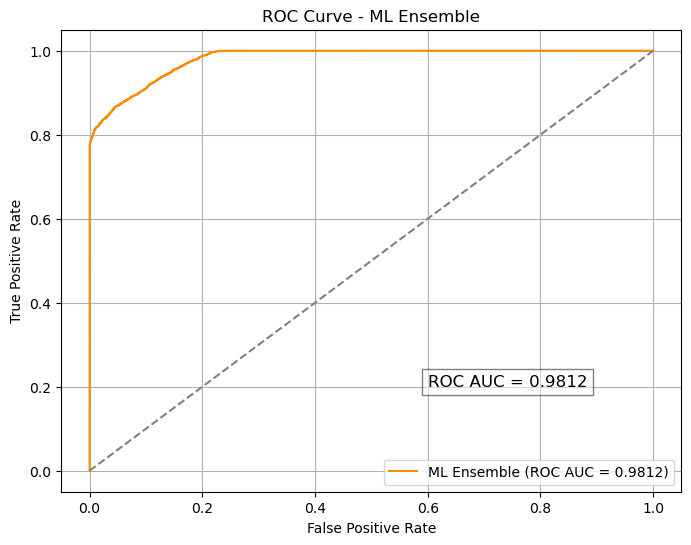

<Figure size 800x600 with 0 Axes>

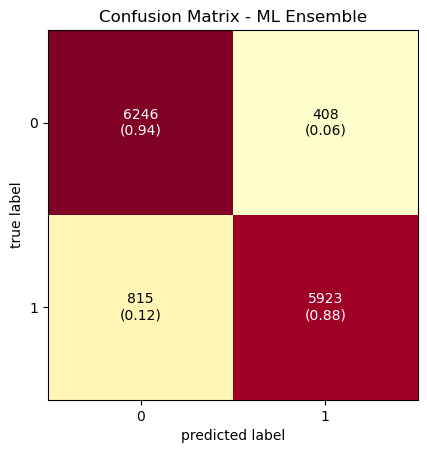

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

419/419 [==============================] - 0s 297us/step


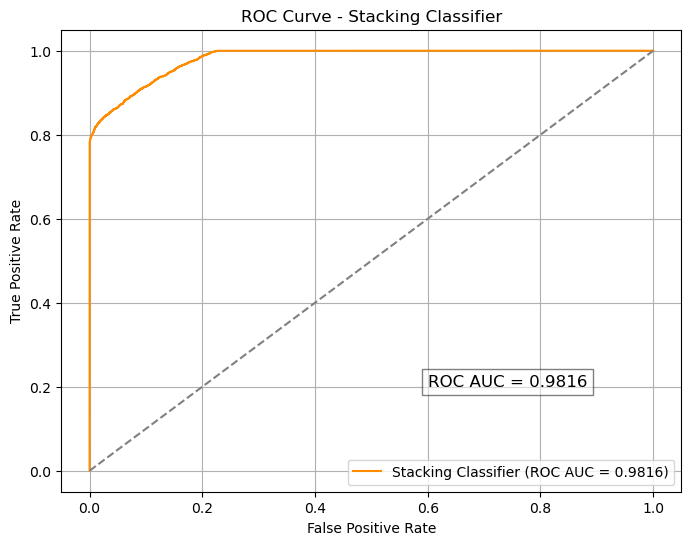

<Figure size 800x600 with 0 Axes>

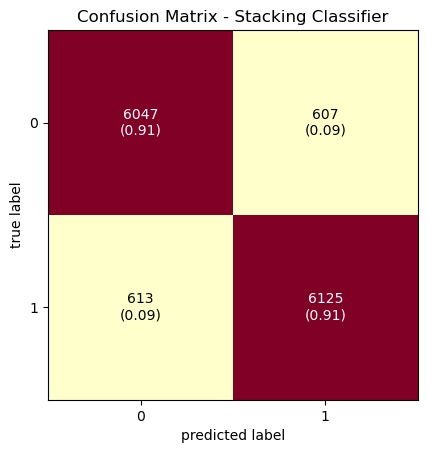

In [55]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


## ALL ENSEMBLE

In [51]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

Learning rate set to 0.056385
0:	learn: 0.5536176	total: 5.83ms	remaining: 5.83s
1:	learn: 0.4534652	total: 11.2ms	remaining: 5.58s
2:	learn: 0.3794373	total: 16ms	remaining: 5.3s
3:	learn: 0.3275783	total: 20.9ms	remaining: 5.19s
4:	learn: 0.2896301	total: 25.9ms	remaining: 5.16s
5:	learn: 0.2593696	total: 30.8ms	remaining: 5.1s
6:	learn: 0.2351026	total: 35.6ms	remaining: 5.04s
7:	learn: 0.2173970	total: 40.1ms	remaining: 4.98s
8:	learn: 0.2031345	total: 45ms	remaining: 4.95s
9:	learn: 0.1976676	total: 49.8ms	remaining: 4.93s
10:	learn: 0.1897258	total: 55ms	remaining: 4.95s
11:	learn: 0.1832191	total: 59.8ms	remaining: 4.93s
12:	learn: 0.1779142	total: 64.9ms	remaining: 4.92s
13:	learn: 0.1733025	total: 69.4ms	remaining: 4.89s
14:	learn: 0.1692888	total: 74.8ms	remaining: 4.91s
15:	learn: 0.1670161	total: 79.2ms	remaining: 4.87s
16:	learn: 0.1641404	total: 84.8ms	remaining: 4.9s
17:	learn: 0.1624388	total: 89.5ms	remaining: 4.88s
18:	learn: 0.1609630	total: 94.9ms	remaining: 4.9s
19

195:	learn: 0.1439378	total: 997ms	remaining: 4.09s
196:	learn: 0.1438727	total: 1s	remaining: 4.08s
197:	learn: 0.1438243	total: 1.01s	remaining: 4.08s
198:	learn: 0.1437714	total: 1.01s	remaining: 4.07s
199:	learn: 0.1437432	total: 1.01s	remaining: 4.06s
200:	learn: 0.1436896	total: 1.02s	remaining: 4.06s
201:	learn: 0.1436502	total: 1.03s	remaining: 4.05s
202:	learn: 0.1436185	total: 1.03s	remaining: 4.05s
203:	learn: 0.1435788	total: 1.04s	remaining: 4.04s
204:	learn: 0.1435347	total: 1.04s	remaining: 4.04s
205:	learn: 0.1434444	total: 1.04s	remaining: 4.03s
206:	learn: 0.1433860	total: 1.05s	remaining: 4.02s
207:	learn: 0.1433542	total: 1.05s	remaining: 4.02s
208:	learn: 0.1432954	total: 1.06s	remaining: 4.01s
209:	learn: 0.1432494	total: 1.06s	remaining: 4.01s
210:	learn: 0.1431969	total: 1.07s	remaining: 4s
211:	learn: 0.1431589	total: 1.07s	remaining: 3.99s
212:	learn: 0.1431175	total: 1.08s	remaining: 4.01s
213:	learn: 0.1430602	total: 1.09s	remaining: 4.02s
214:	learn: 0.1430

391:	learn: 0.1346782	total: 2s	remaining: 3.1s
392:	learn: 0.1346417	total: 2s	remaining: 3.1s
393:	learn: 0.1346055	total: 2.01s	remaining: 3.09s
394:	learn: 0.1345585	total: 2.02s	remaining: 3.09s
395:	learn: 0.1344905	total: 2.02s	remaining: 3.08s
396:	learn: 0.1344413	total: 2.02s	remaining: 3.08s
397:	learn: 0.1343732	total: 2.03s	remaining: 3.07s
398:	learn: 0.1343321	total: 2.04s	remaining: 3.07s
399:	learn: 0.1343087	total: 2.04s	remaining: 3.06s
400:	learn: 0.1342672	total: 2.05s	remaining: 3.06s
401:	learn: 0.1342248	total: 2.05s	remaining: 3.05s
402:	learn: 0.1341973	total: 2.06s	remaining: 3.04s
403:	learn: 0.1341610	total: 2.06s	remaining: 3.04s
404:	learn: 0.1341165	total: 2.06s	remaining: 3.03s
405:	learn: 0.1340788	total: 2.07s	remaining: 3.03s
406:	learn: 0.1340292	total: 2.08s	remaining: 3.02s
407:	learn: 0.1339864	total: 2.08s	remaining: 3.02s
408:	learn: 0.1339421	total: 2.09s	remaining: 3.02s
409:	learn: 0.1339095	total: 2.09s	remaining: 3.01s
410:	learn: 0.133874

552:	learn: 0.1281743	total: 2.81s	remaining: 2.27s
553:	learn: 0.1281294	total: 2.81s	remaining: 2.26s
554:	learn: 0.1281006	total: 2.82s	remaining: 2.26s
555:	learn: 0.1280699	total: 2.82s	remaining: 2.25s
556:	learn: 0.1280275	total: 2.83s	remaining: 2.25s
557:	learn: 0.1279906	total: 2.83s	remaining: 2.24s
558:	learn: 0.1279471	total: 2.84s	remaining: 2.24s
559:	learn: 0.1279055	total: 2.84s	remaining: 2.23s
560:	learn: 0.1278397	total: 2.85s	remaining: 2.23s
561:	learn: 0.1278067	total: 2.85s	remaining: 2.22s
562:	learn: 0.1277644	total: 2.86s	remaining: 2.22s
563:	learn: 0.1277204	total: 2.86s	remaining: 2.21s
564:	learn: 0.1276767	total: 2.87s	remaining: 2.21s
565:	learn: 0.1276542	total: 2.87s	remaining: 2.2s
566:	learn: 0.1276020	total: 2.88s	remaining: 2.2s
567:	learn: 0.1275695	total: 2.88s	remaining: 2.19s
568:	learn: 0.1275241	total: 2.89s	remaining: 2.19s
569:	learn: 0.1274817	total: 2.89s	remaining: 2.18s
570:	learn: 0.1274276	total: 2.9s	remaining: 2.18s
571:	learn: 0.1

712:	learn: 0.1225890	total: 3.62s	remaining: 1.46s
713:	learn: 0.1225304	total: 3.62s	remaining: 1.45s
714:	learn: 0.1225068	total: 3.63s	remaining: 1.45s
715:	learn: 0.1224583	total: 3.63s	remaining: 1.44s
716:	learn: 0.1224162	total: 3.64s	remaining: 1.44s
717:	learn: 0.1223857	total: 3.64s	remaining: 1.43s
718:	learn: 0.1223668	total: 3.65s	remaining: 1.43s
719:	learn: 0.1223305	total: 3.65s	remaining: 1.42s
720:	learn: 0.1222928	total: 3.66s	remaining: 1.42s
721:	learn: 0.1222659	total: 3.66s	remaining: 1.41s
722:	learn: 0.1222175	total: 3.67s	remaining: 1.41s
723:	learn: 0.1221816	total: 3.67s	remaining: 1.4s
724:	learn: 0.1221365	total: 3.68s	remaining: 1.4s
725:	learn: 0.1221069	total: 3.68s	remaining: 1.39s
726:	learn: 0.1220714	total: 3.69s	remaining: 1.39s
727:	learn: 0.1220370	total: 3.69s	remaining: 1.38s
728:	learn: 0.1219960	total: 3.7s	remaining: 1.38s
729:	learn: 0.1219510	total: 3.7s	remaining: 1.37s
730:	learn: 0.1219120	total: 3.71s	remaining: 1.36s
731:	learn: 0.12

871:	learn: 0.1173896	total: 4.42s	remaining: 649ms
872:	learn: 0.1173575	total: 4.42s	remaining: 644ms
873:	learn: 0.1173316	total: 4.43s	remaining: 639ms
874:	learn: 0.1172975	total: 4.43s	remaining: 633ms
875:	learn: 0.1172662	total: 4.44s	remaining: 628ms
876:	learn: 0.1172433	total: 4.44s	remaining: 623ms
877:	learn: 0.1172116	total: 4.45s	remaining: 618ms
878:	learn: 0.1171748	total: 4.45s	remaining: 613ms
879:	learn: 0.1171619	total: 4.46s	remaining: 608ms
880:	learn: 0.1171361	total: 4.46s	remaining: 603ms
881:	learn: 0.1171132	total: 4.47s	remaining: 598ms
882:	learn: 0.1170907	total: 4.47s	remaining: 593ms
883:	learn: 0.1170483	total: 4.48s	remaining: 588ms
884:	learn: 0.1170154	total: 4.48s	remaining: 583ms
885:	learn: 0.1169975	total: 4.49s	remaining: 578ms
886:	learn: 0.1169597	total: 4.49s	remaining: 572ms
887:	learn: 0.1169384	total: 4.5s	remaining: 567ms
888:	learn: 0.1168994	total: 4.5s	remaining: 562ms
889:	learn: 0.1168654	total: 4.51s	remaining: 557ms
890:	learn: 0.

In [56]:
all_ensemble_accuracy = metrics.accuracy_score(y_test, all_pred)
all_ensemble_precision = precision_score(y_test, all_pred)
all_ensemble_recall = recall_score(y_test, all_pred)
all_ensemble_f1 = f1_score(y_test, all_pred)
all_ensemble_roc_auc = roc_auc_score(y_test, all_pred)

print("Ensemble of DL and ML Metrics:")
print(f"Accuracy: {all_ensemble_accuracy:.4f}")
print(f"Precision: {all_ensemble_precision:.4f}")
print(f"Recall: {all_ensemble_recall:.4f}")
print(f"F1 Score: {all_ensemble_f1:.4f}")
print(f"ROC AUC Score: {all_ensemble_roc_auc:.4f}")

Ensemble of DL and ML Metrics:
Accuracy: 0.9087
Precision: 0.9356
Recall: 0.8790
F1 Score: 0.9064
ROC AUC Score: 0.9089
